In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.491 Seconds
Building M ...
	Done. Took 1.195 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 14.457
	Done. Took 89.307 Seconds
Extracting Qis ...
	Done. Took 0.003 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: -0.890*(0.336)^t + 6.555*(0.125)^t + 0.112*(-0.079)^t + -2.741*(-0.012)^t + -3.037144 * delta(t,0)
		RMSE = 0.023
		Matlab: [-0.89  0.34  6.55  0.13  0.11 -0.08 -2.74 -0.01]
	Done. Took 13.229 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: 0.071*(0.902)^t + 0.168*(-0.046)^t + 3.309*(-0.026)^t + 0.437*(0.568)^t + -3.985330 * delta(t,0)
		RMSE = 0.037
		Matlab: [ 0.07  0.9   0.17 -0.05  3.31 -0.03  0.44  0.57]
	Done. Took 9.283 Seconds
Learning Convolution for Q(1,4) ...
	Q(1,4) XOM <-- JPM: -1.728*(0.218)^t + -4.608*(0.217)^t + 7.704*(0.159)^t + -0.166*(0.270)^t + -1.202132 * delta

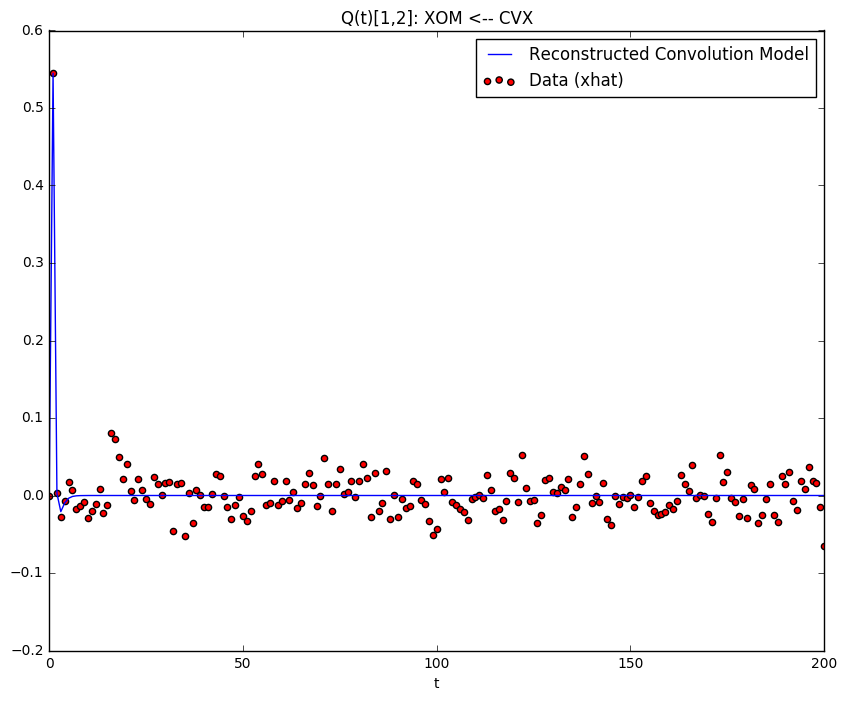

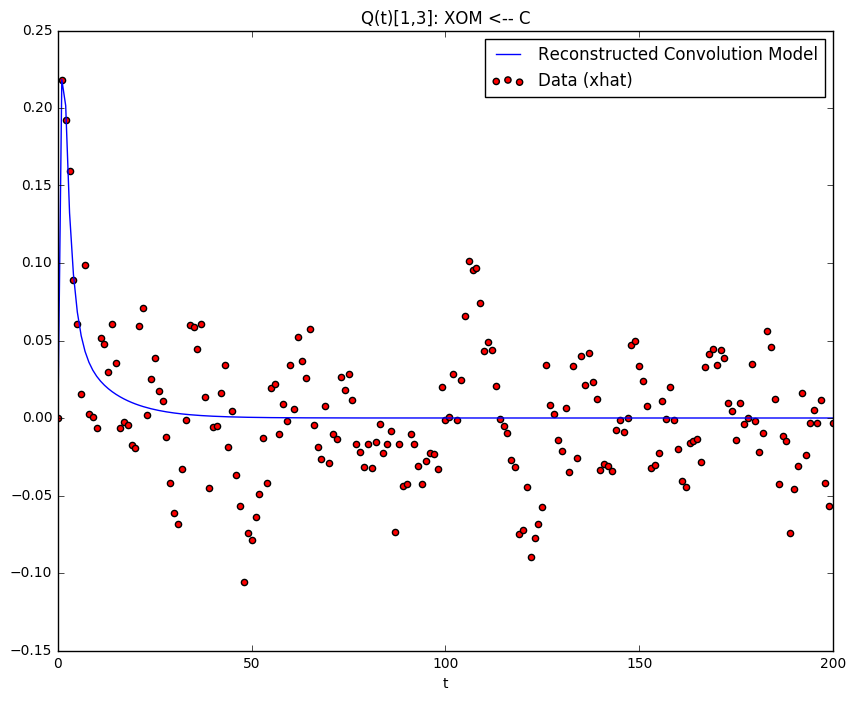

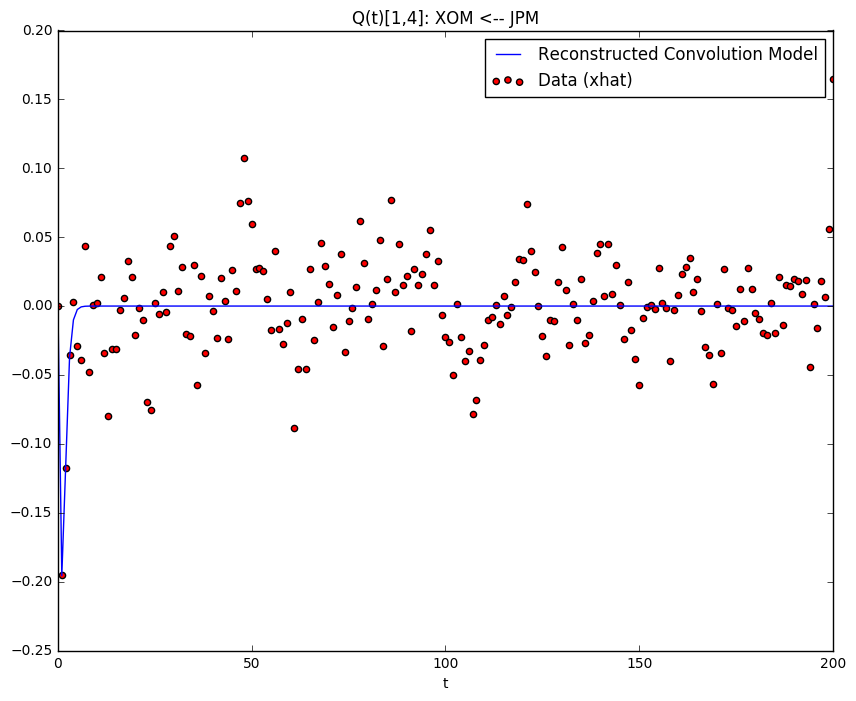

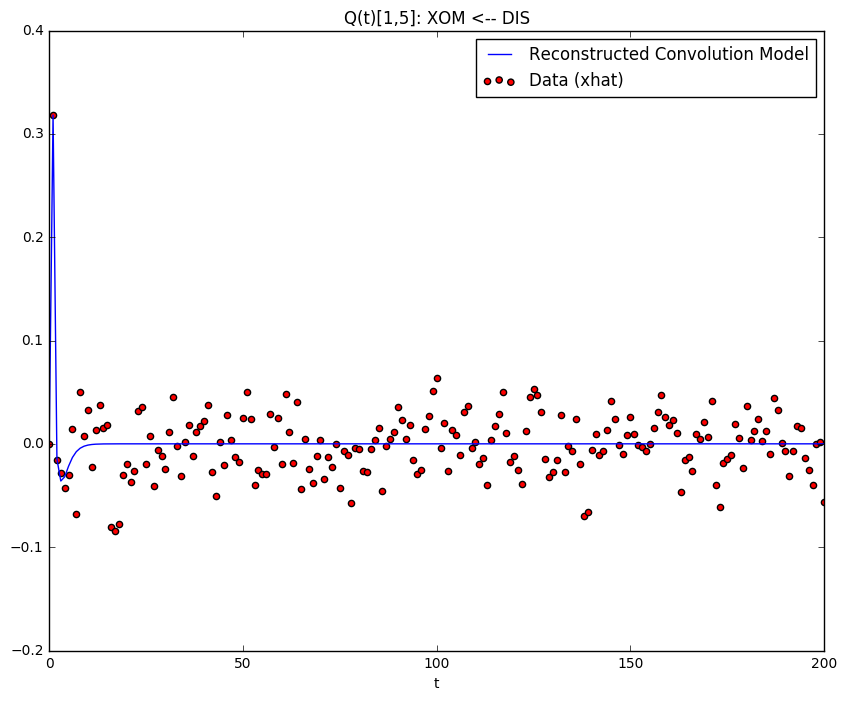

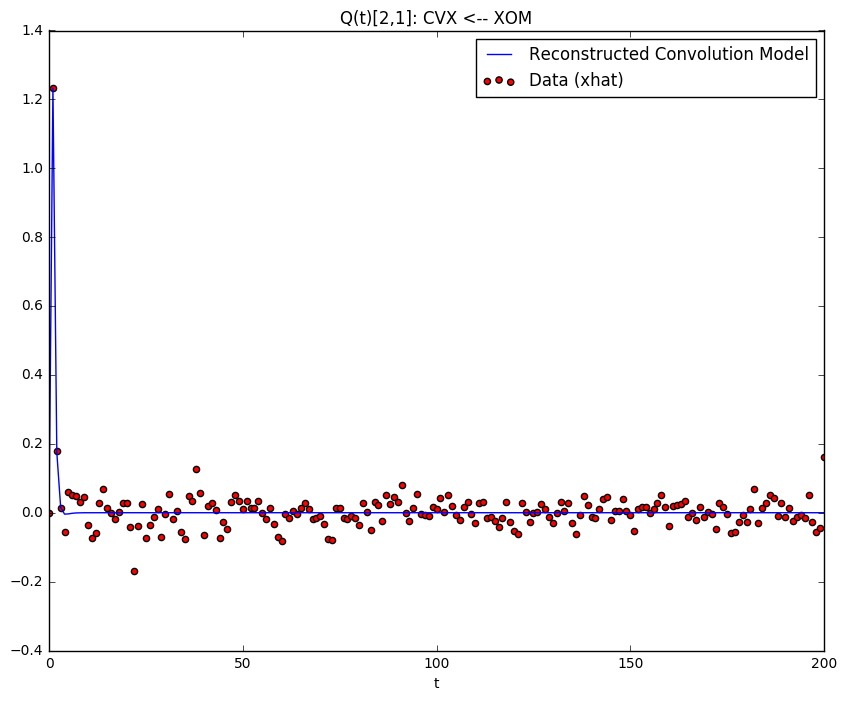

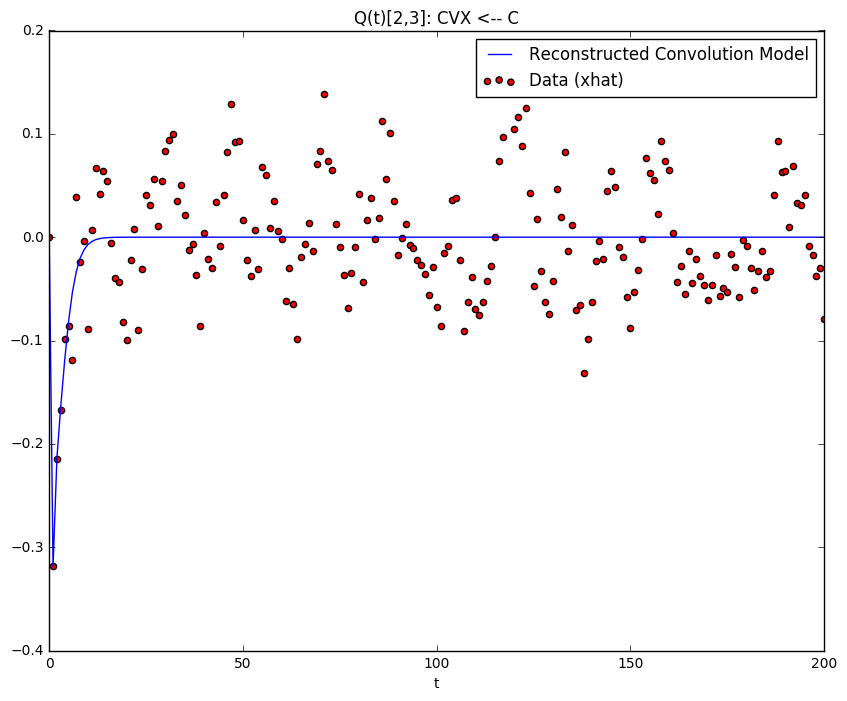

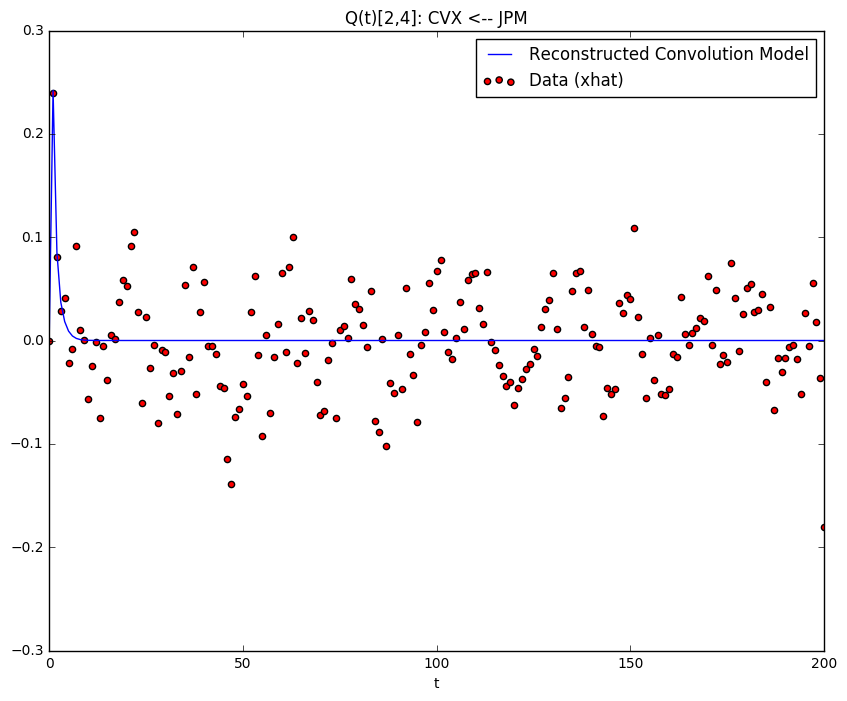

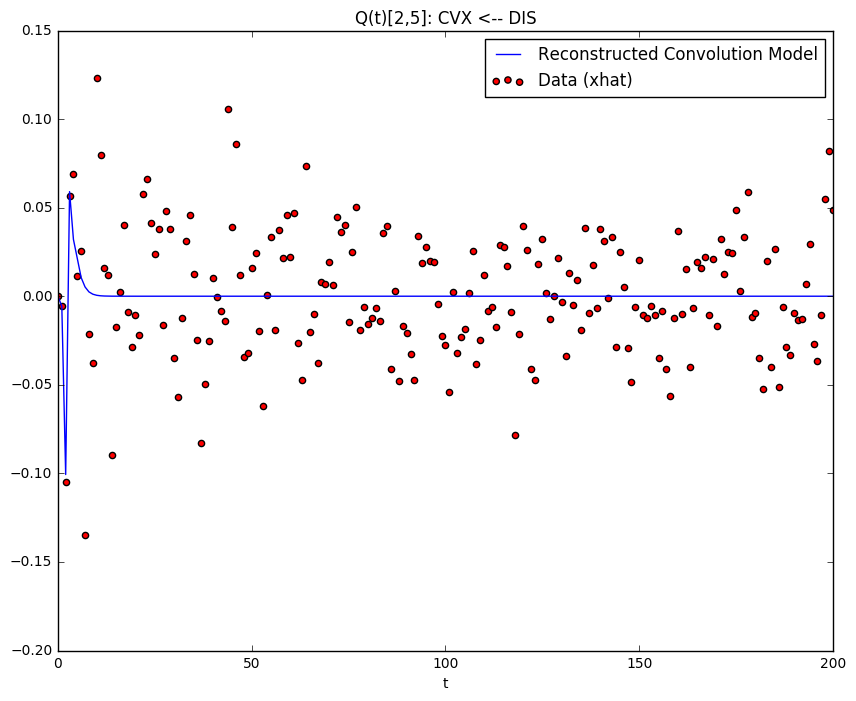

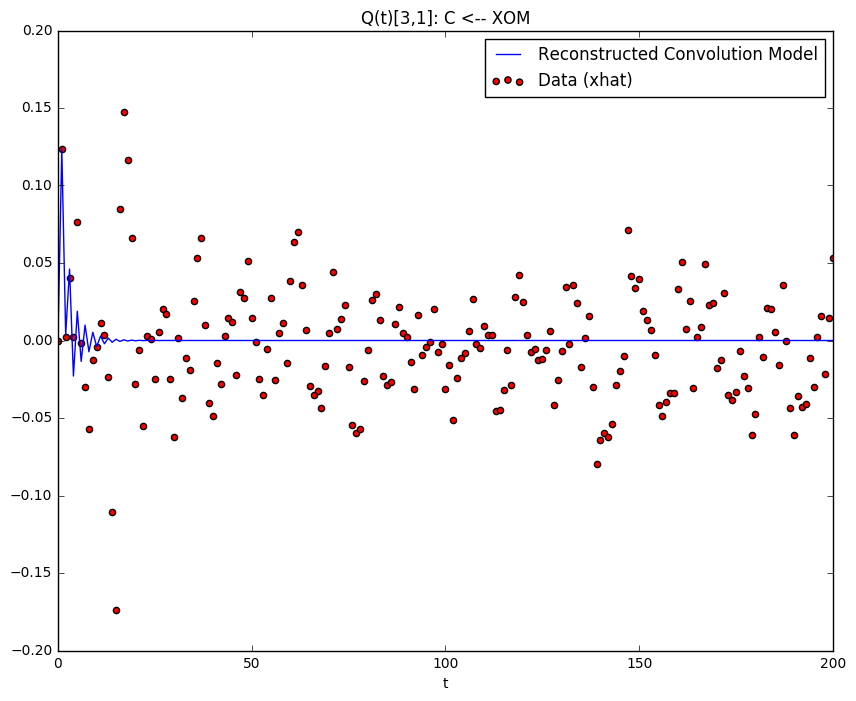

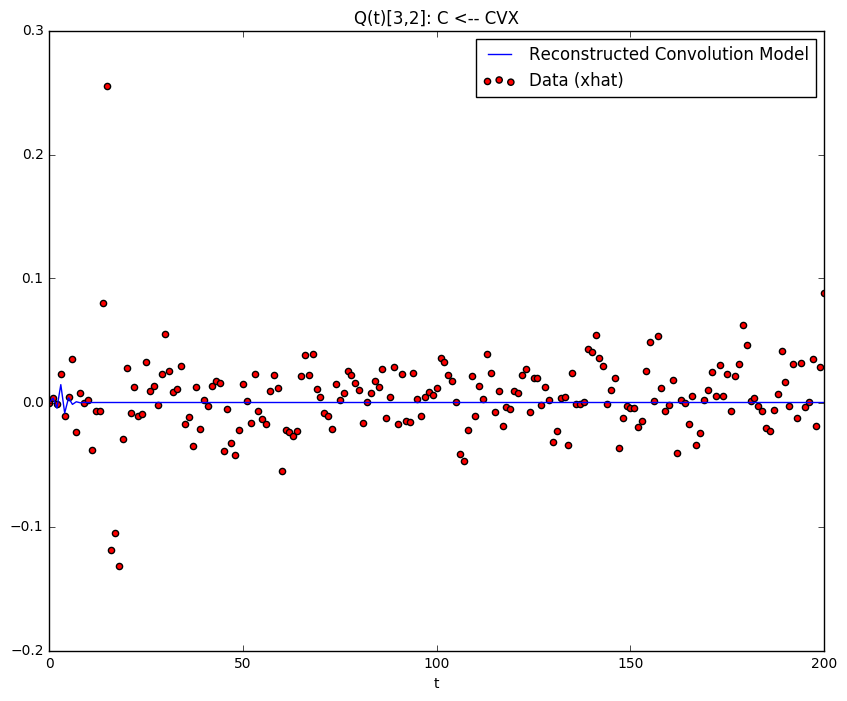

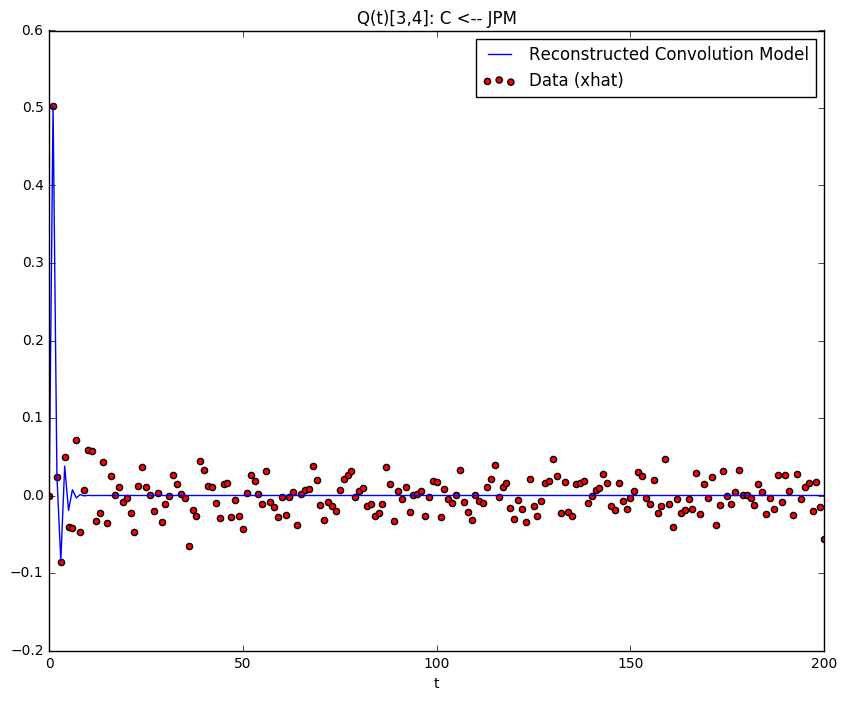

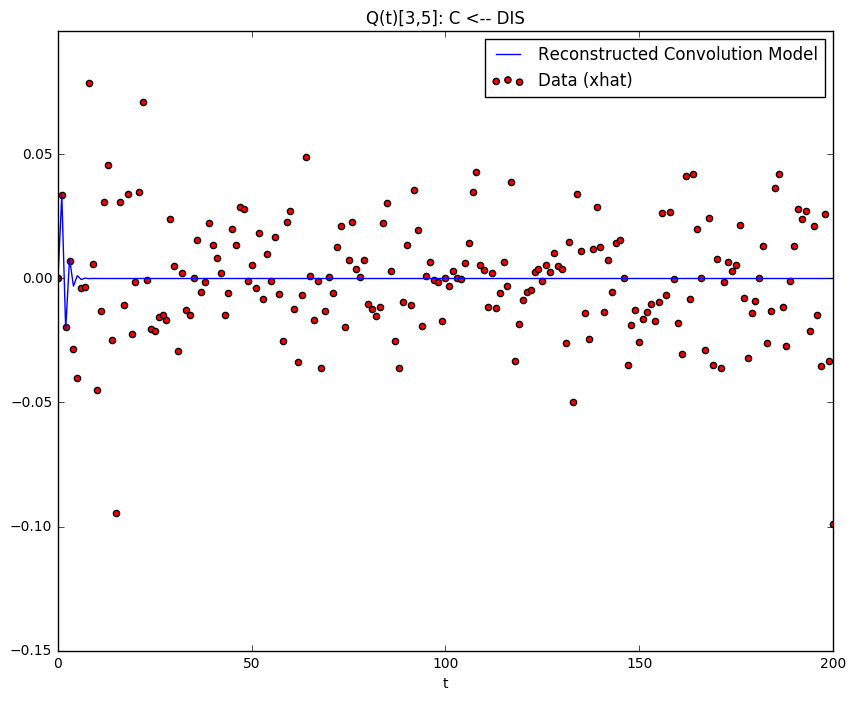

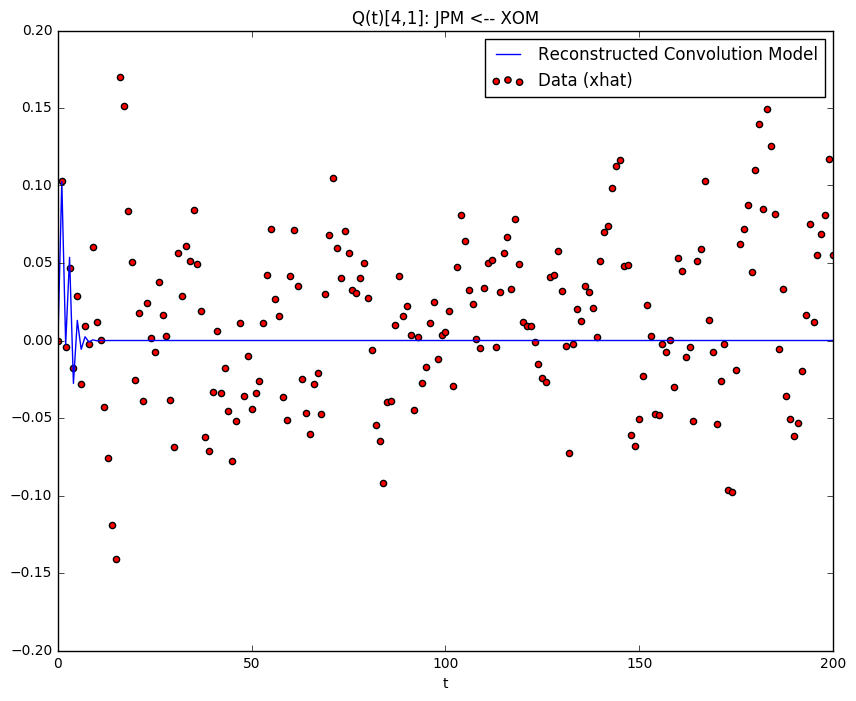

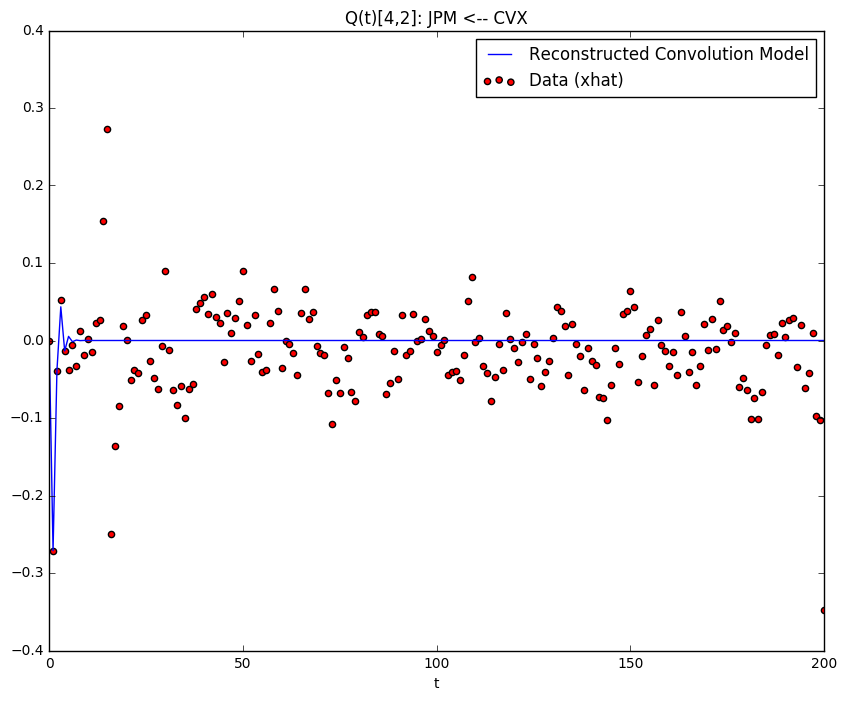

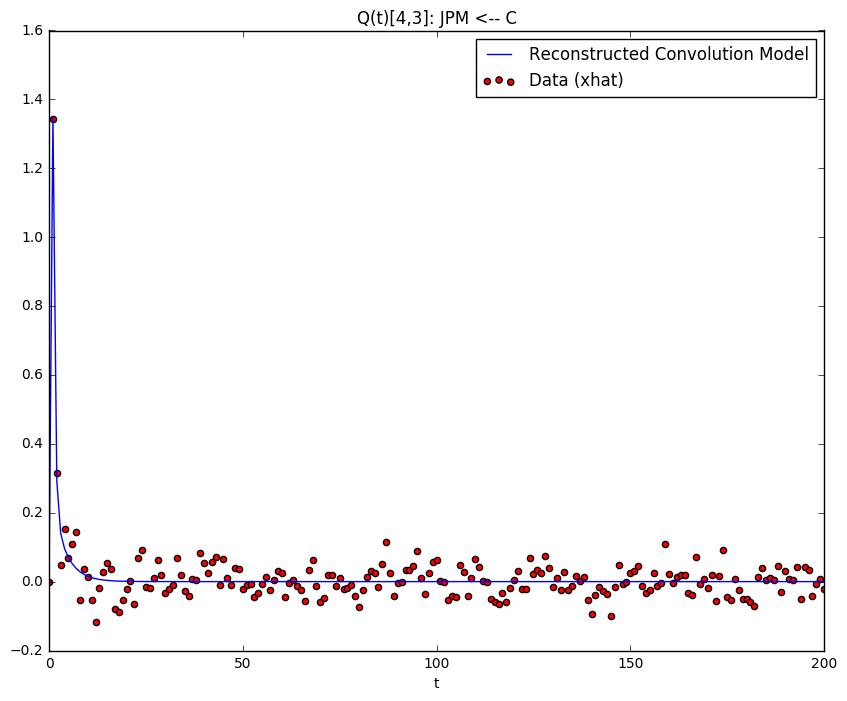

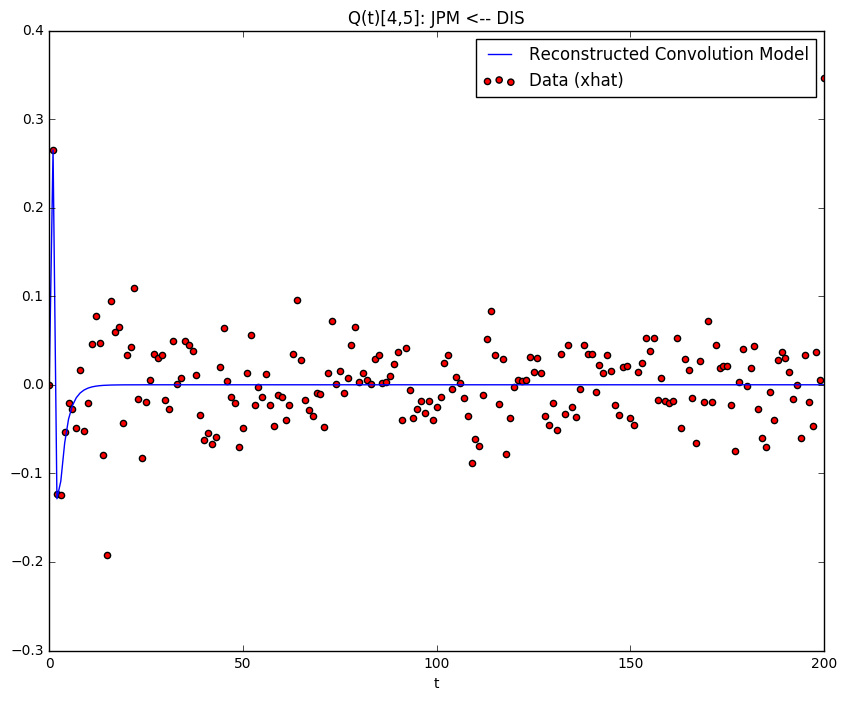

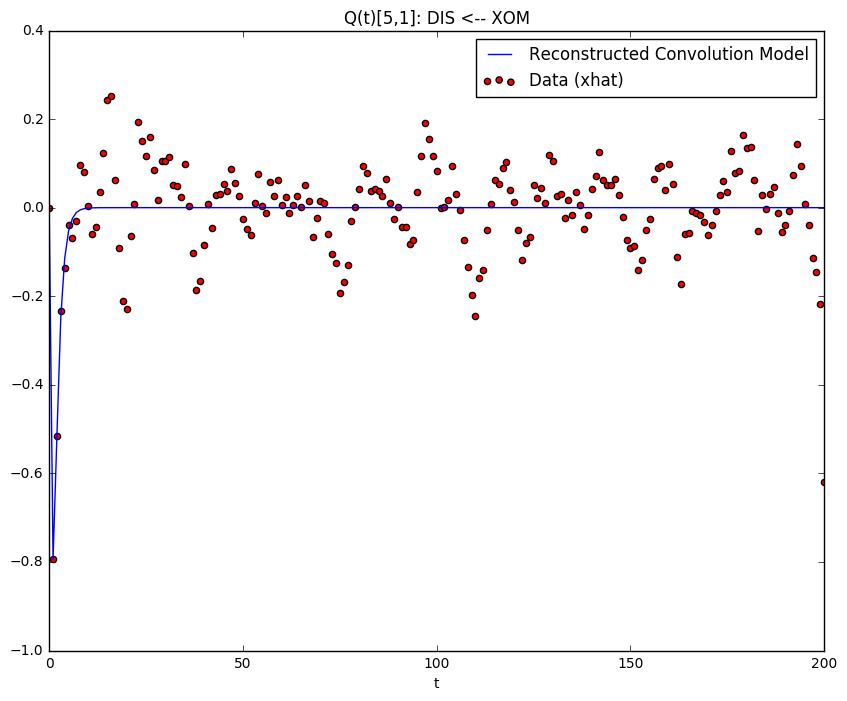

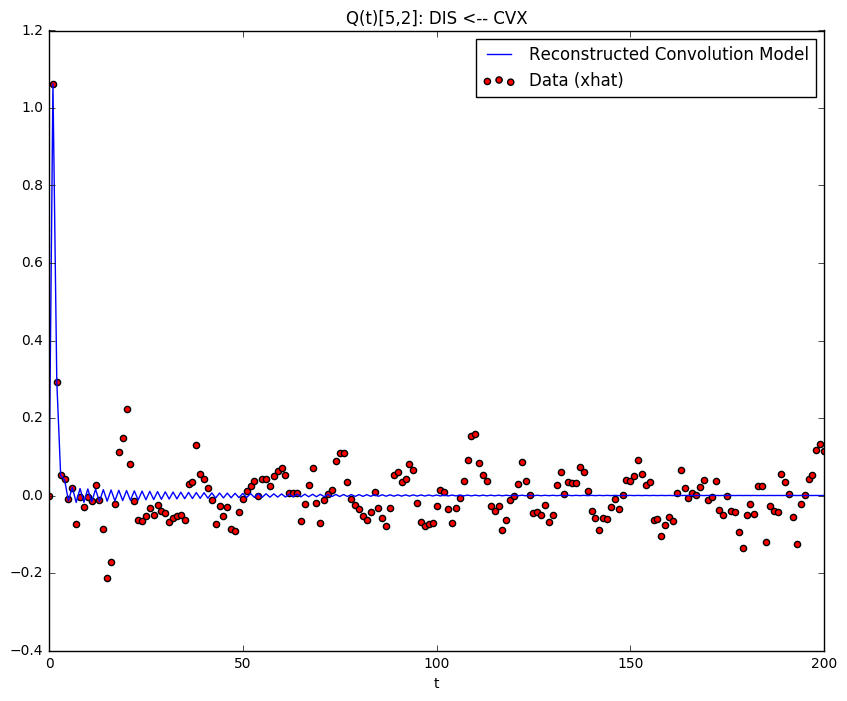

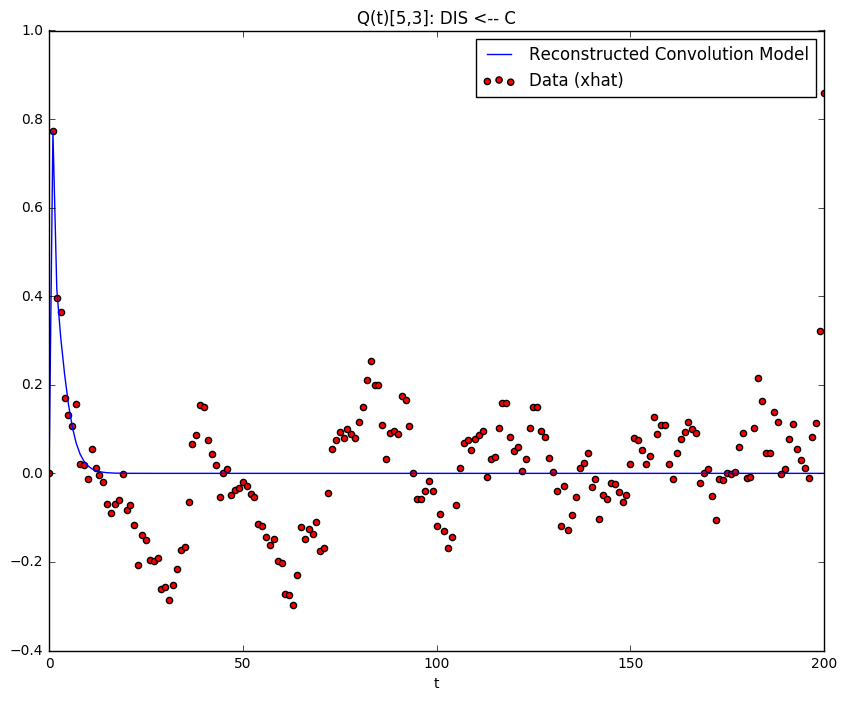

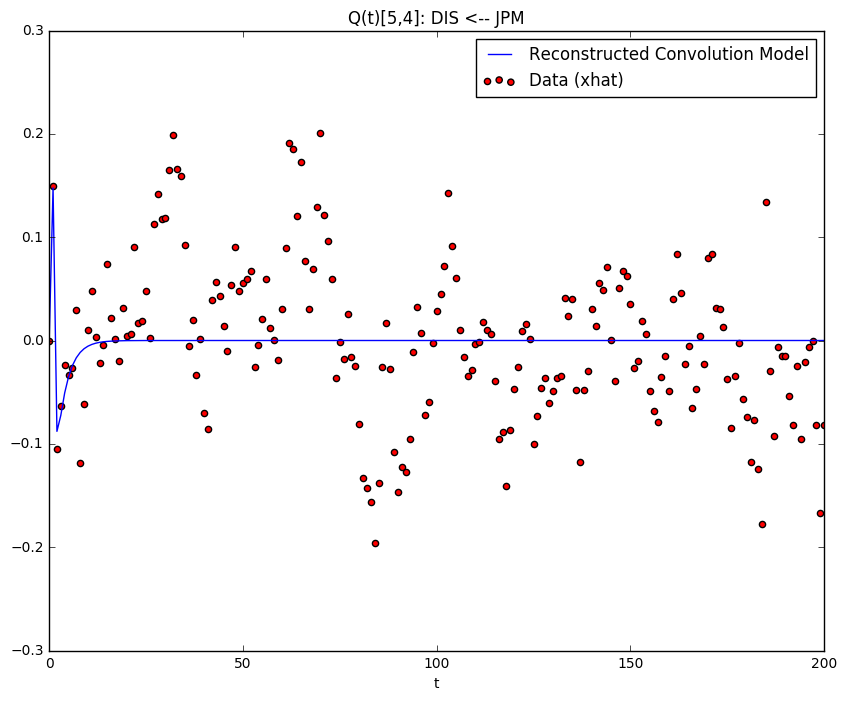

In [2]:
%matplotlib inline
cols = ['XOM', 'CVX', 'C', 'JPM', 'DIS']

y = pd.read_csv('tdf.csv', index_col=0, parse_dates=True)

fulldf = y
y = y[cols].values

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-0.889528325427 0.335552304451 6.5548942644 0.125103261989 0.112441708354 -0.0787088215051 -2.74066396615 -0.011689467767 ; 0.0712261255418 0.901988101694 0.168225404639 -0.0462333179852 3.30916822598 -0.0260768269236 0.436709807208 0.568264321232 ; -1.72817934846 0.218210391312 -4.60757531766 0.21661010745 7.70423234274 0.15892775128 -0.166345367049 0.270378125362 ; -0.208156256478 0.298378868142 -3.64750022972 -0.047450970253 -1.17270663867 0.510152208068 2.04558579889 0.393738904851 ; -2.19529306458 0.327432176929 4.23248543005 0.0491351510097 1.63417218532 0.230889687978 5.96182175883 0.229187769275 ; -7.07540210661 0.306865016994 6.83597875756 0.385628024755 1.42863479652 0.237015850617 -1.95466009564 0.574000880796 ; 2.23481895513 0.145938361884 1.41766023175 0.41858443945 -3.37336065416 0.0260709273139 -1.66473227231 0.354140215803 ; -1.62612548041 -0.214162445723 6.09431753481 0.02503215506 -4.13742516037 0.282958122839 1.46442301128 0.453645948805 ; -0.0361089

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.596 Seconds
Building M ...
	Done. Took 1.264 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 4.780 Seconds
Extracting Qis ...
	Done. Took 0.012 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: -1.783*(-0.041)^t + -0.840*(0.066)^t + 5.564*(0.046)^t + -0.456*(0.107)^t + -2.484027 * delta(t,0)
		RMSE = 0.003
		Matlab: [-1.78 -0.04 -0.84  0.07  5.56  0.05 -0.46  0.11]
	Done. Took 50.563 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: 0.294*(-0.000)^t + 0.159*(0.010)^t + -0.092*(-0.001)^t + -0.114*(0.013)^t + -0.247102 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 0.29 -0.    0.16  0.01 -0.09 -0.   -0.11  0.01]
	Done. Took 83.474 Seconds
Learning Convolution for Q(1,4) ...
	Q(1,4) XOM <-- JPM: 0.359*(-0.024)^t + 0.953*(-0.038)^t + -0.166*(-0.071)^t + -0.728*(0.031)^t + -0.417447 * del

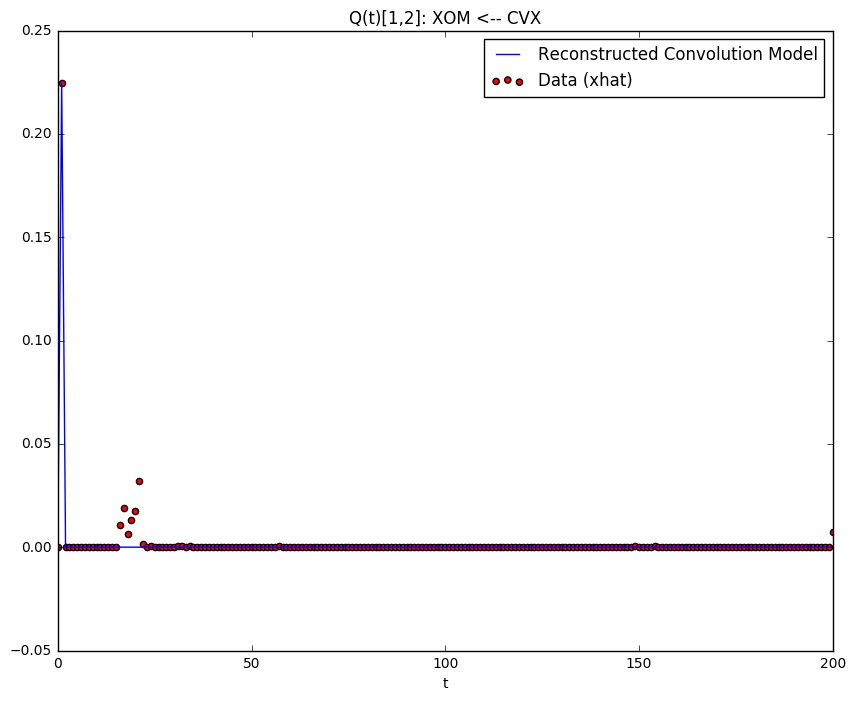

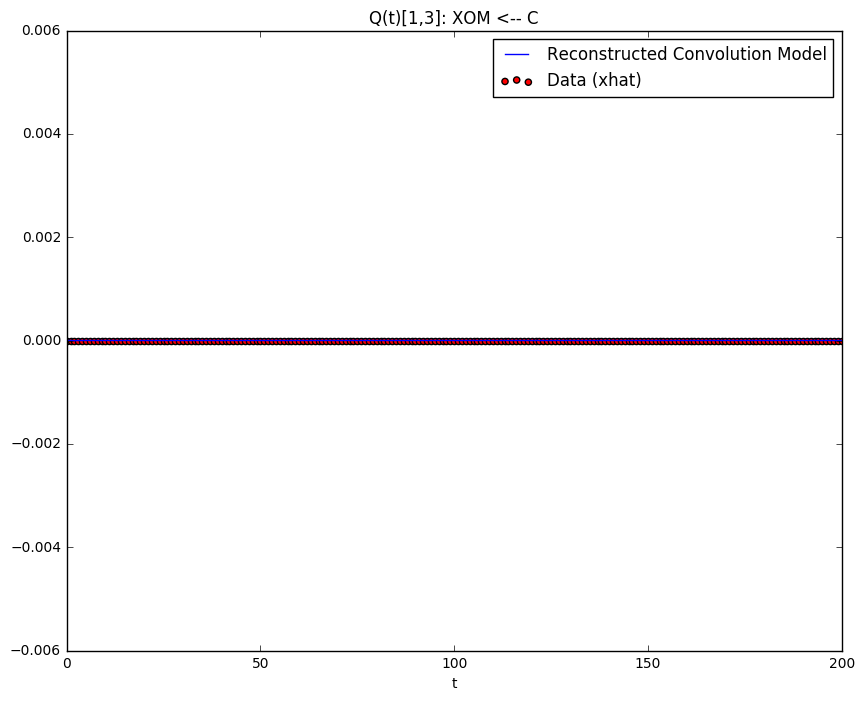

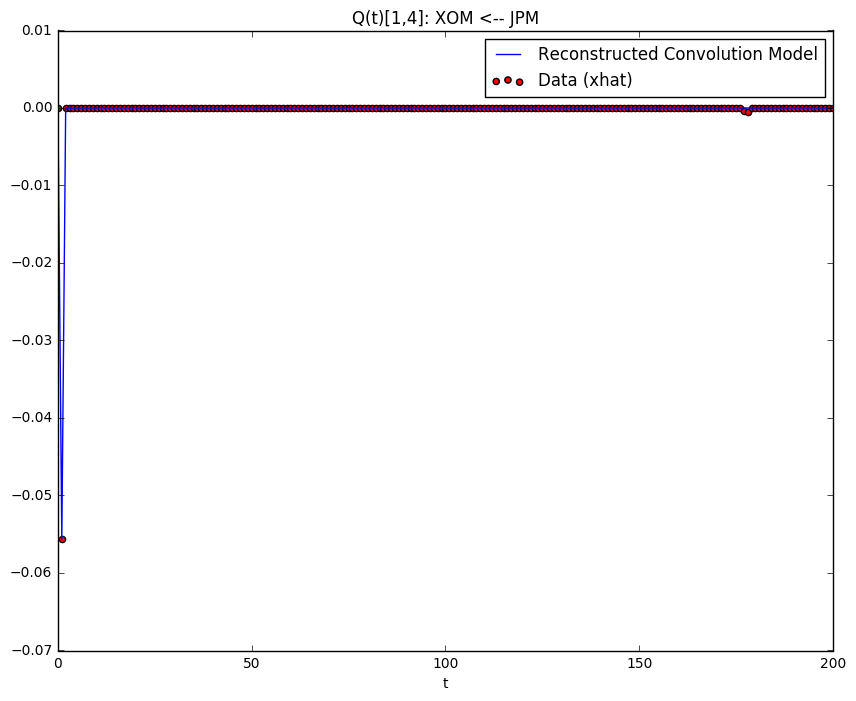

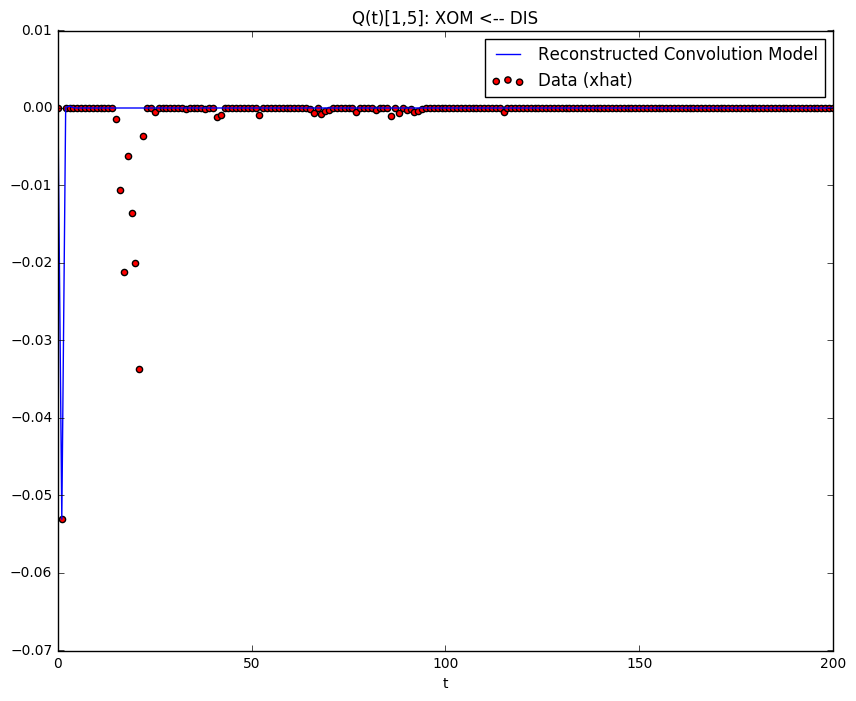

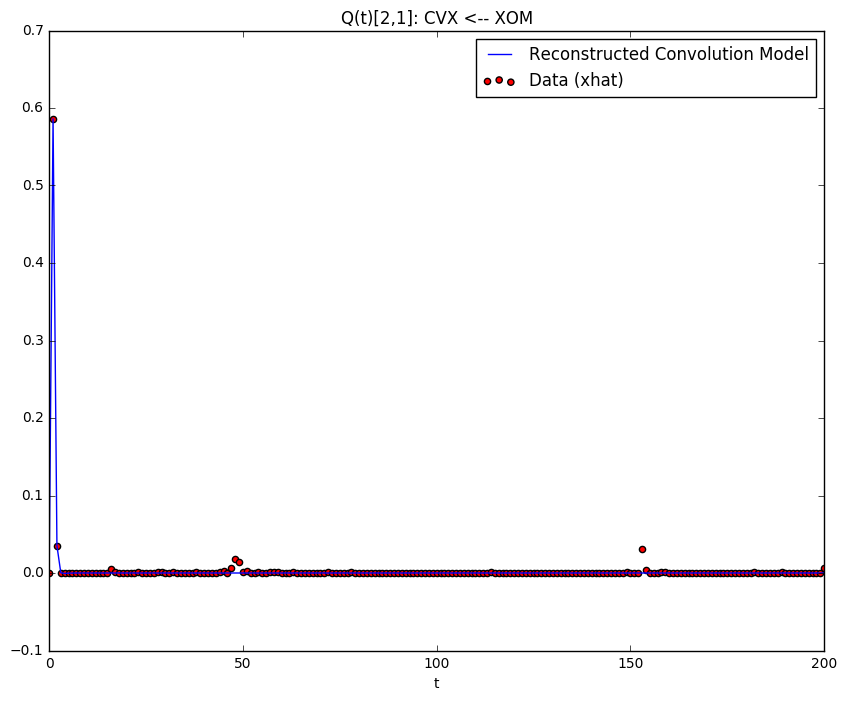

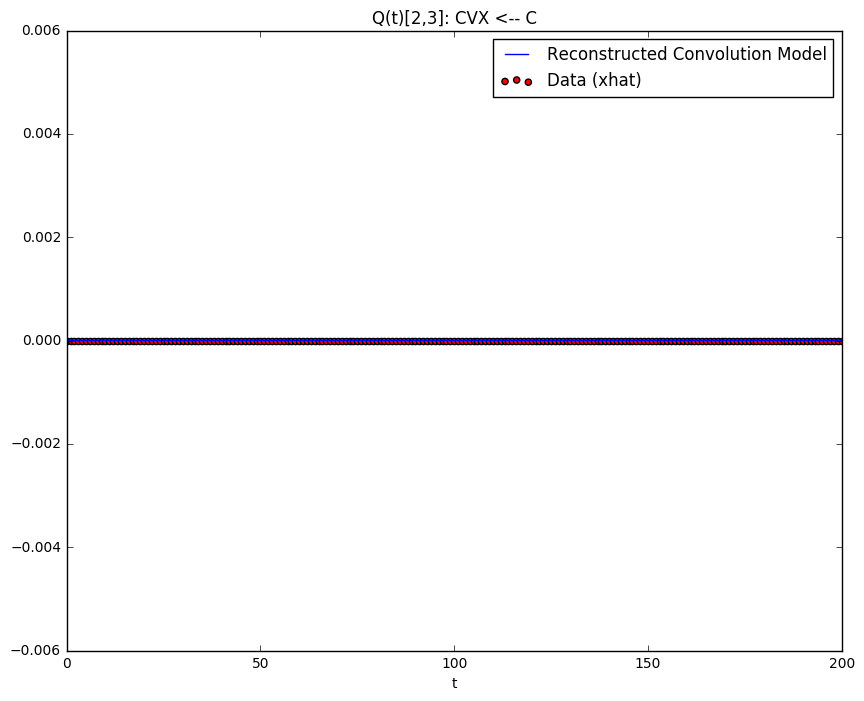

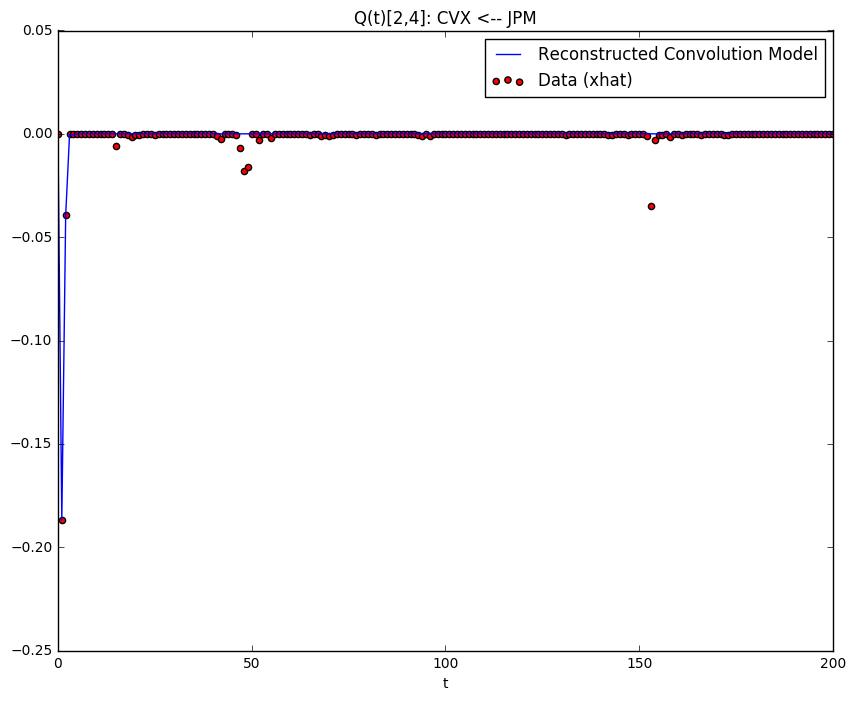

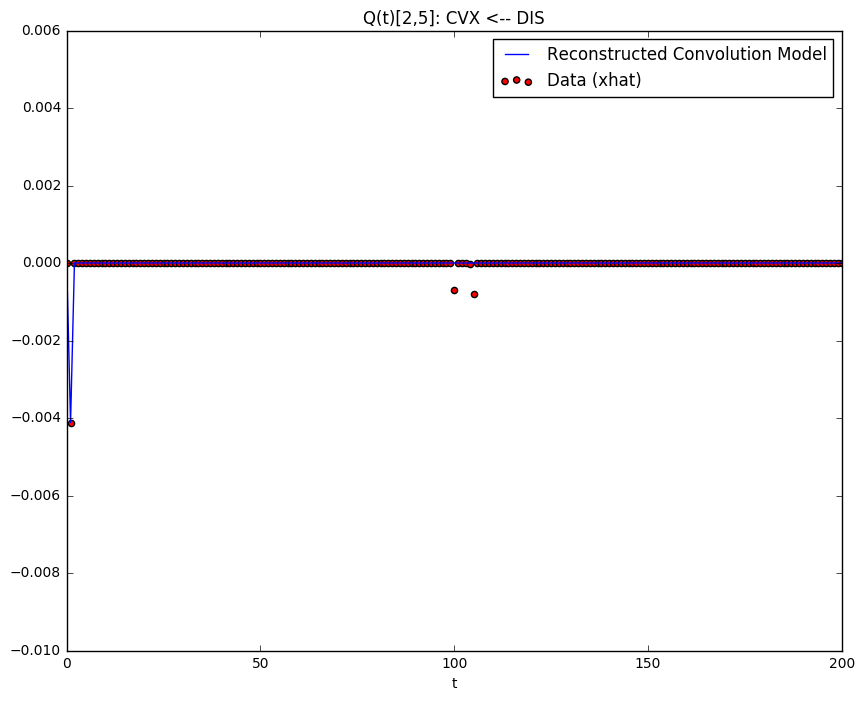

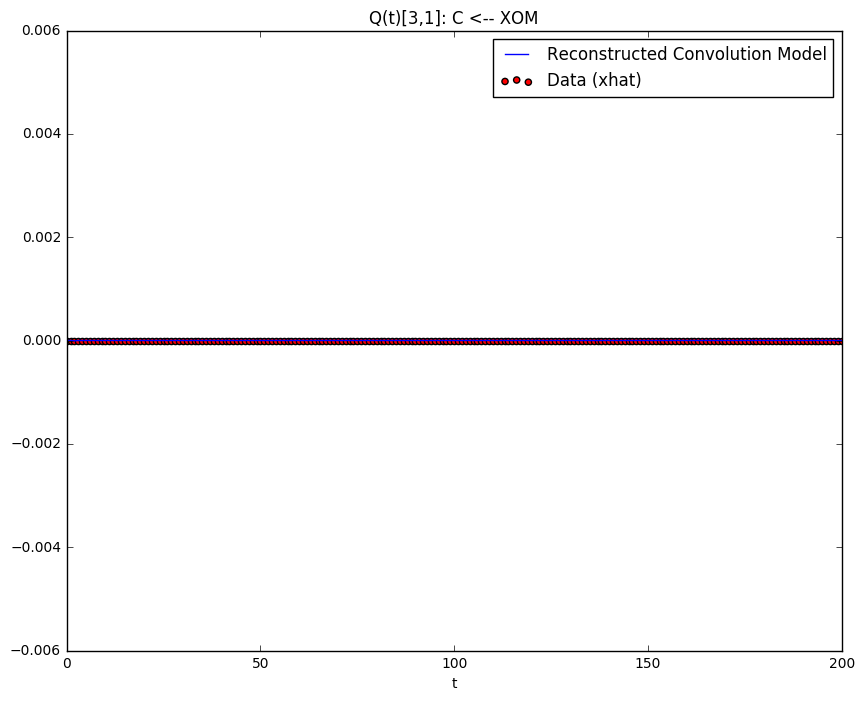

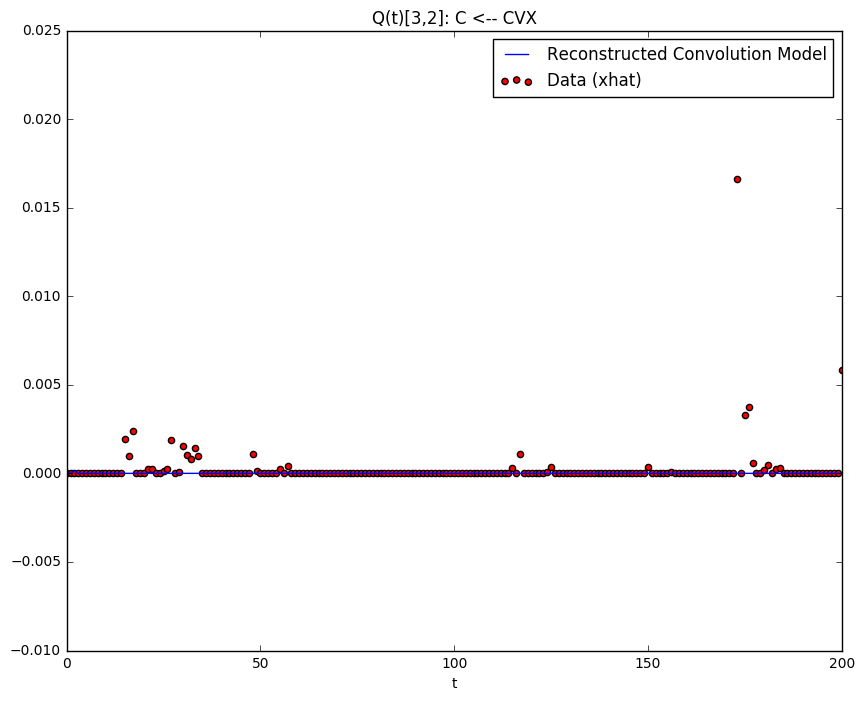

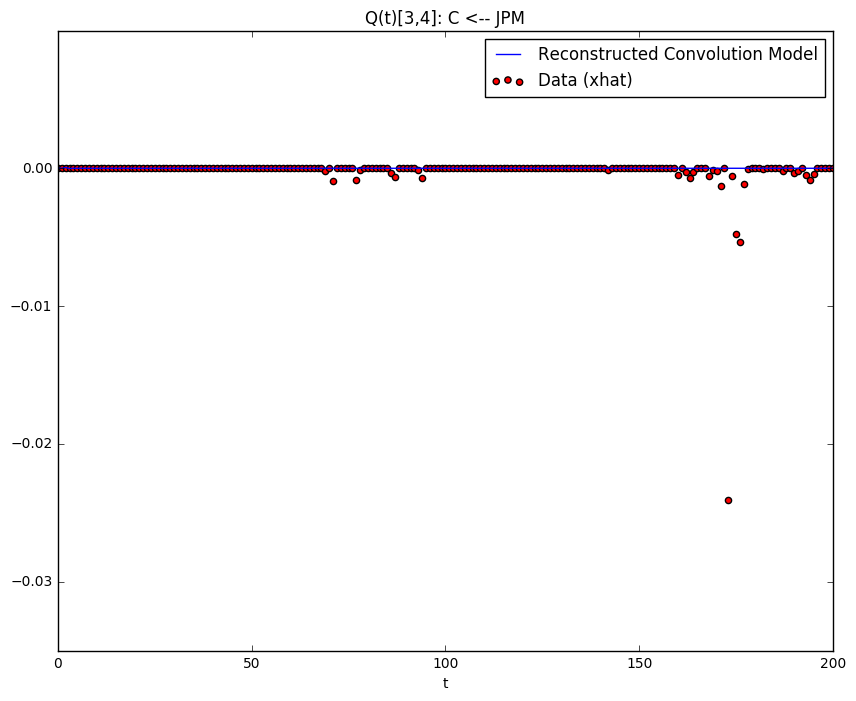

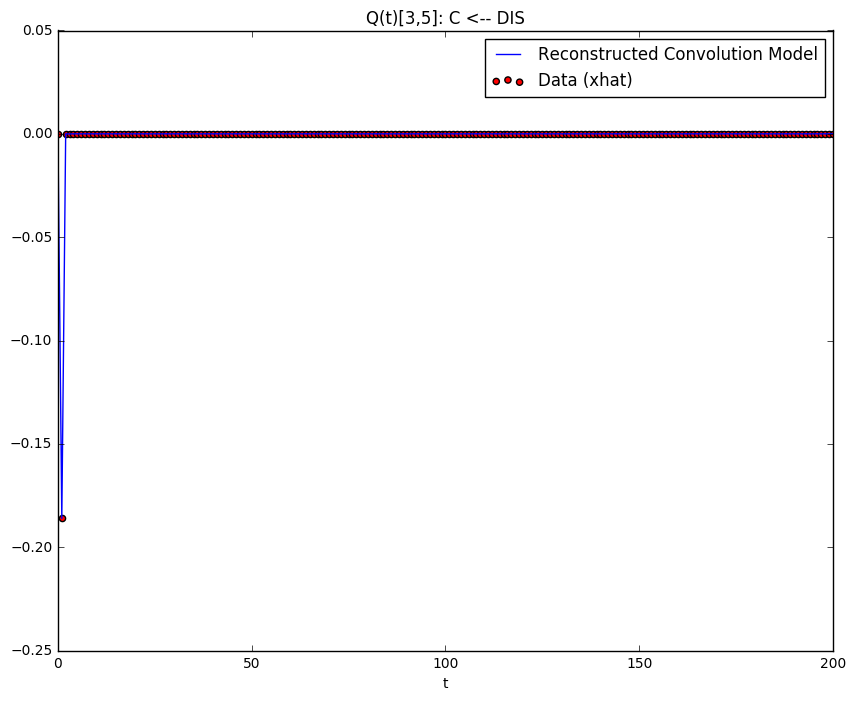

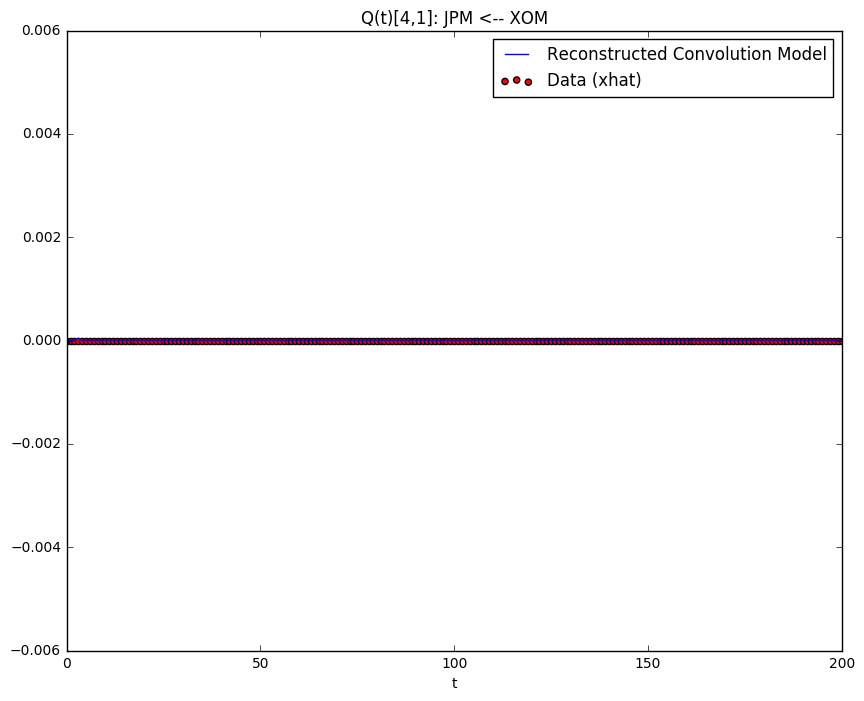

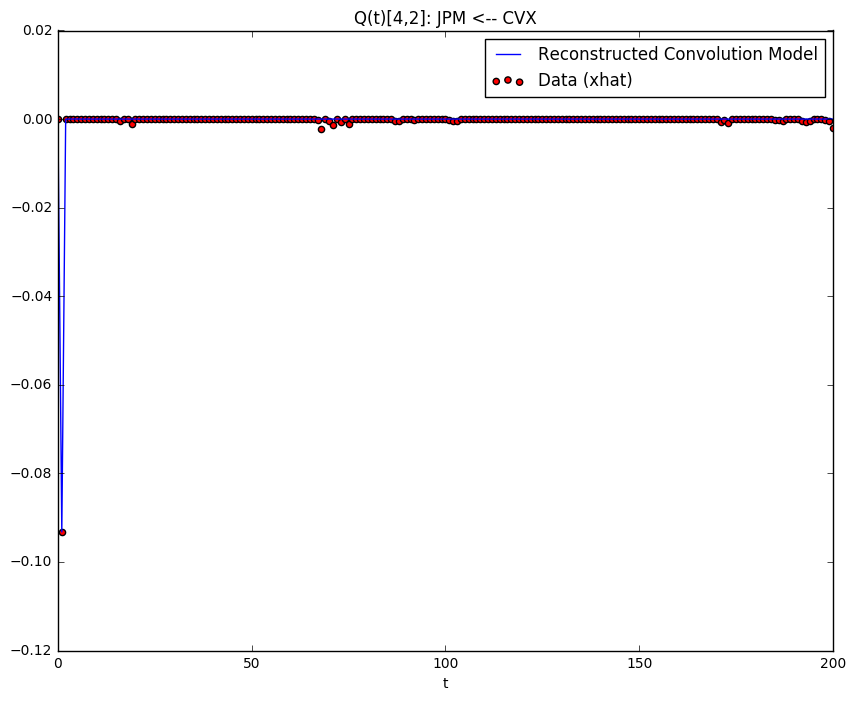

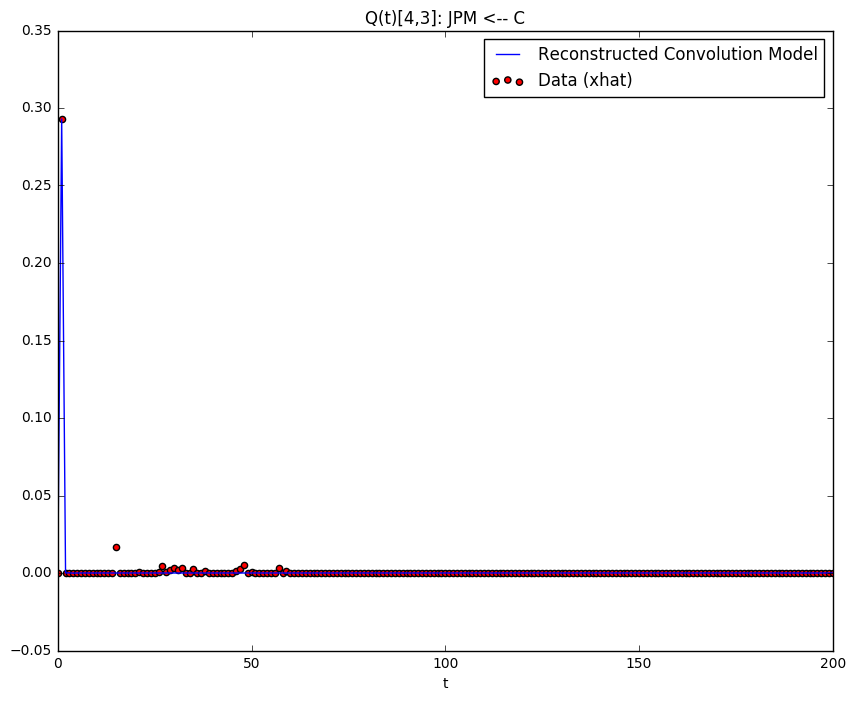

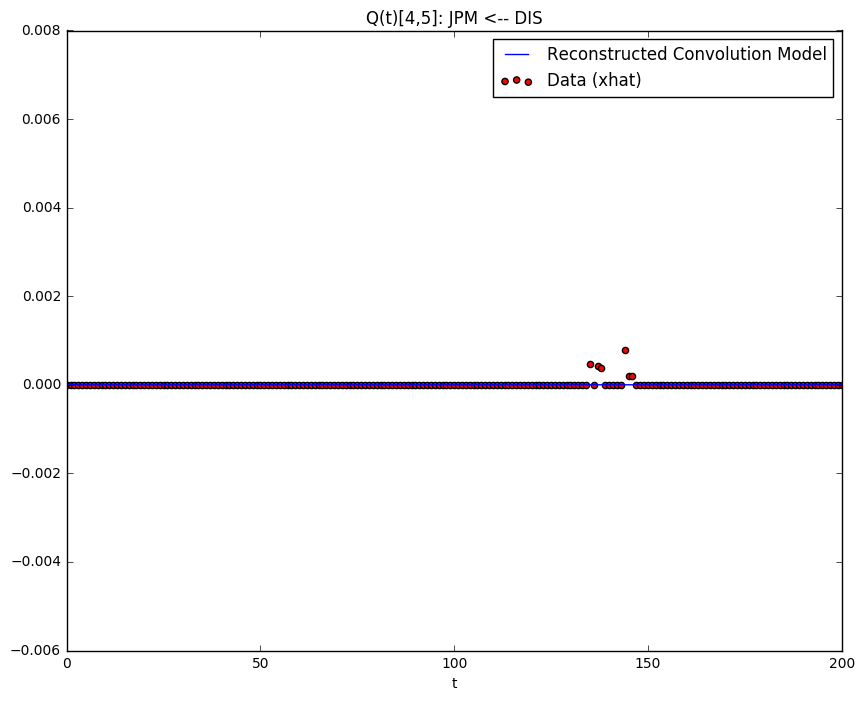

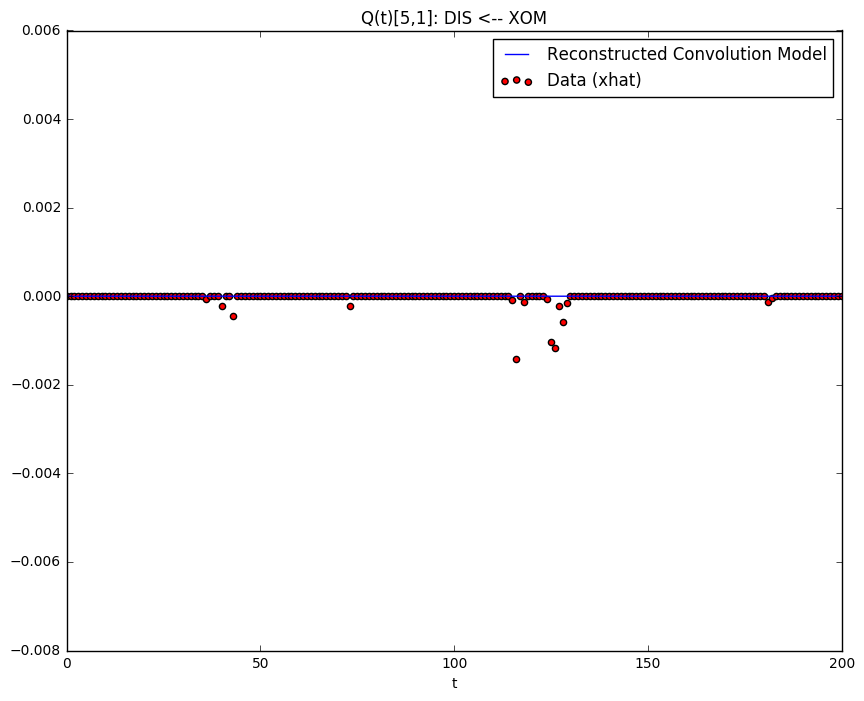

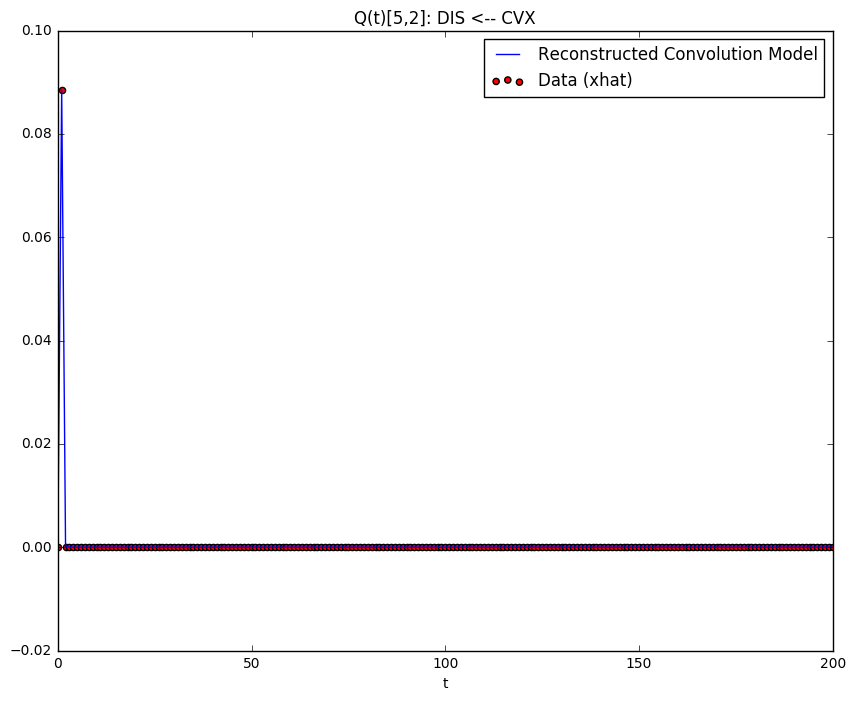

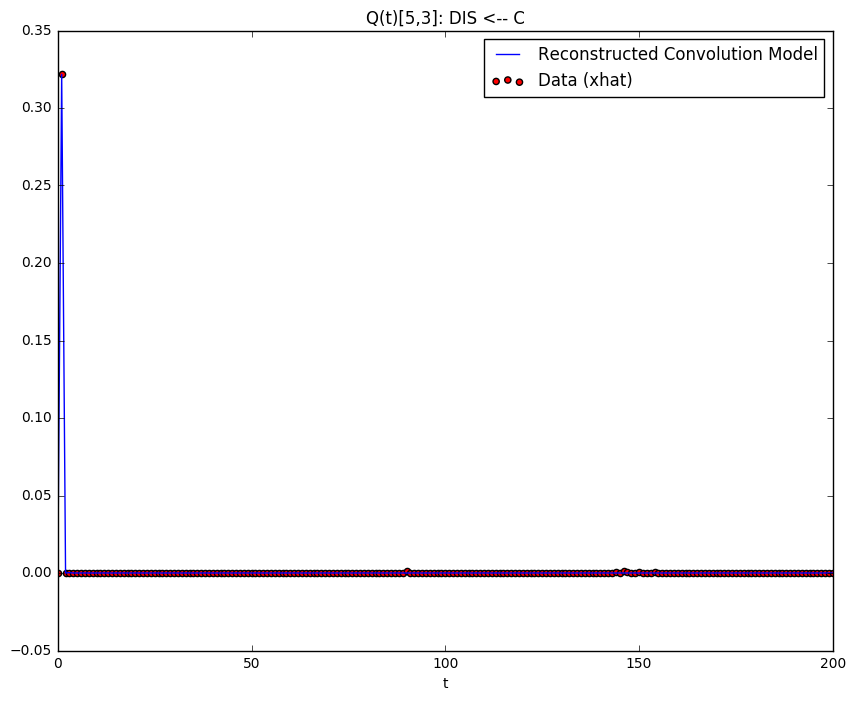

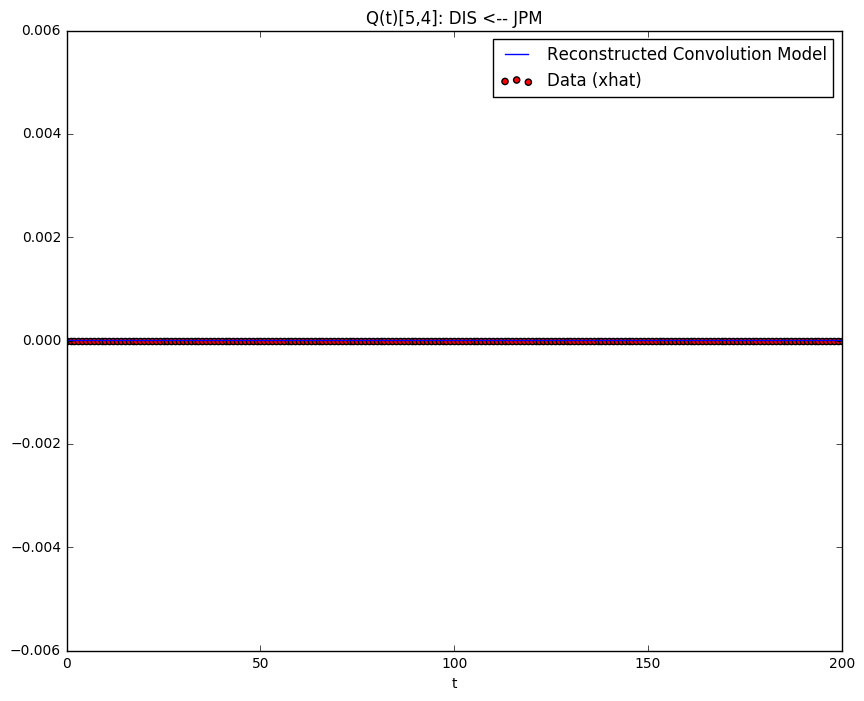

In [6]:
%matplotlib inline
y = pd.read_csv('tdf.csv', index_col=0, parse_dates=True)

fulldf = y
y = y[cols].values
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [7]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-1.78348245674 -0.0405734338907 -0.840489977063 0.0664018191353 5.56444840616 0.0461253251363 -0.456448687558 0.106633480225 ; 0.294160545777 -0.000498043622572 0.15875075404 0.00964145248328 -0.0919955812668 -0.000594242654351 -0.113813224199 0.0126410651065 ; 0.358526154871 -0.0240795056763 0.95330518437 -0.0377191852674 -0.166186032139 -0.0711641571665 -0.728198462956 0.0314016920103 ; 0.431704934199 0.0249174511993 -3.14943092462 0.0486031735829 -0.0179301106491 0.00426028489822 1.09991988889 0.0812161478569 ; -0.780946951131 0.197216850384 6.08763965994 0.0114272082539 6.97515667777 0.0963557372269 -0.808692480027 0.00205305768669 ; 1.2314591607 0.0012088414802 -0.119888579316 0.00179526826243 -0.249220133521 0.00342135846932 -0.33561484251 0.00125363757417 ; -3.51133945181 0.0858173227383 -0.700806135393 -0.139998423176 -0.138817821832 -0.0292627758433 0.408998559879 0.0301046980073 ; 2.00010330389 -0.00162416392902 0.469541423601 0.00357357161748 -0.367190601636